<div width="50%">
<img src="../../img/dipy_logo.png" width=10%/>  <img align="right" src=../../img/gsoc_logo.png width=10% />
</div>

**Student**\
David Romero-Bascones\
**Mentors**\
Bramsh Qamar Chandio\
Shreyas Fadnavis\
Jong Sung Park

# **Discrete Bundle Atlas**

Scripts used to compute discrete atlas of a bundle.

In [2]:
from os.path import join
import numpy as np
import pandas as pd
from nibabel.tmpdirs import TemporaryDirectory
import matplotlib.pyplot as plt
from IPython.display import clear_output

from dipy.atlasing.bundles import compute_atlas_bundle
from dipy.viz import actor, window

In [3]:
def render_bundles(bundles, linewidth=None, colors=None, opacity=None, show_3d=False, show_2d=False, R=90):
    n_bundle = len(bundles)
    
    if colors is None:
        colors = list(np.random.rand(len(bundles), 3))
    
    if opacity is None:
        opacity = np.repeat(0.5, n_bundle)
    
    if linewidth is None:
        linewidth = np.repeat(0.3, n_bundle)
    
    scene = window.Scene()
    scene.SetBackground(1., 1, 1)
    for i, bundle in enumerate(bundles):
        lines_actor = actor.streamtube(bundle, linewidth=linewidth[i], opacity=opacity[i], colors=colors[i])
        
        lines_actor.RotateZ(R)
        lines_actor.RotateY(R)
        scene.add(lines_actor)
    if show_3d:
        window.show(scene)
    if show_2d:
        img = window.snapshot(scene, size=(2000, 2000))
        return img

In [4]:
def show_bundles(ax, bundles, linewidth=None, opacity=None, colors=None, labels=None, R=90):
    
    I = render_bundles(bundles, linewidth, colors, opacity, show_2d=True, R=R)
    
    ax.imshow(I)
    ax.invert_yaxis()
    _ = ax.axis('off')
    if labels is not None:
        ax.set_title(labels,fontsize=16)

## **PPMI data**

32 control subjects and X bundles [openly available](https://nih.figshare.com/articles/dataset/DIPY_Processed_Parkinson_s_Progression_Markers_Initiative_PPMI_Data_Derivatives/12033390).

In [5]:
in_dir = '/home/david/Dropbox (MGEP)/projects/GSoC-2021/data/PPMI_data/'
mid_path = 'rec_bundles'
subjects = f'{in_dir}/subjects.csv'
group = 'control'

df = pd.DataFrame(['moved_AF_L__recognized', 'moved_CCMid__recognized', 'moved_CC_ForcepsMinor__recognized',
                  'moved_CST_L__recognized', 'moved_IFOF_R__recognized', 'moved_V__recognized'], columns=['bundle'])
# df = pd.DataFrame(['moved_AF_L__recognized', 'moved_CCMid__recognized'], columns=['bundle'])
R = [90, 0, 0, 90, -90, 0]

bundle_names = None                 
model_bundle_dir = None
merge_out = True
save_temp = False
n_stream_min = 10
n_stream_max = 3000
n_point = 20

### RLAP + keep

In [5]:
distance = 'mdf'
comb_method = 'rlap_keep'
skip_pairs = False

with TemporaryDirectory() as out_dir:
    
    # Save the bundle list as a temporary folder
    bundle_names = join(out_dir, 'bundles.tsv')
    df.to_csv(bundle_names, sep='\t', index=False)

    atlas, atlas_merged = compute_atlas_bundle(in_dir=in_dir,
                                                subjects=subjects,
                                                group=group,
                                                mid_path=mid_path,
                                                bundle_names=bundle_names,
                                                model_bundle_dir=model_bundle_dir,
                                                out_dir=out_dir,
                                                merge_out=merge_out,
                                                save_temp=save_temp,
                                                n_stream_min=n_stream_min,
                                                n_stream_max=n_stream_max,
                                                n_point=n_point,
                                                distance=distance,
                                                comb_method=comb_method,
                                                skip_pairs=skip_pairs)
clear_output(wait=True)
print('Finished')

finished


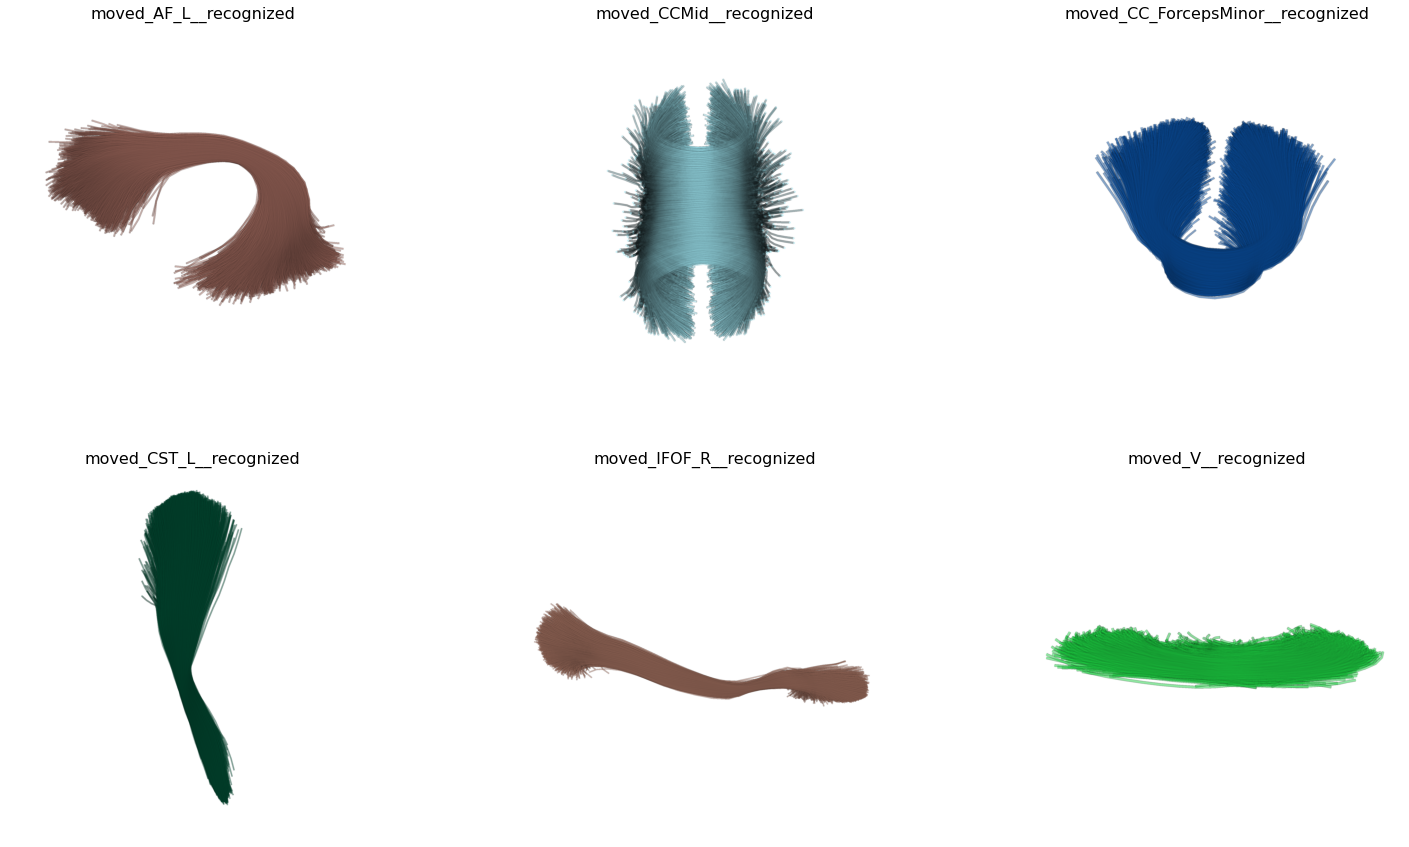

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(26,15))
for i, ax in enumerate(axs.reshape(-1)):
    show_bundles(ax, [atlas[i]], labels = df['bundle'][i], R=R[i])

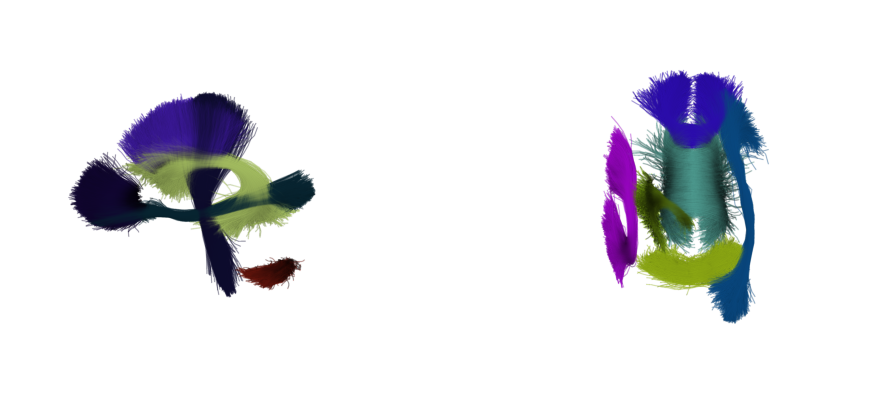

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))
show_bundles(ax[0], atlas, R=90)
show_bundles(ax[1], atlas, R=0)

In [ ]:
# render_bundles(atlas, show_3d=True)

### RLAP + keep + skip_pairs

In [6]:
distance = 'mdf'
comb_method = 'rlap_keep'
skip_pairs = True

with TemporaryDirectory() as out_dir:
    
    # Save the bundle list as a temporary folder
    bundle_names = join(out_dir, 'bundles.tsv')
    df.to_csv(bundle_names, sep='\t', index=False)

    atlas, atlas_merged = compute_atlas_bundle(in_dir=in_dir,
                                                subjects=subjects,
                                                group=group,
                                                mid_path=mid_path,
                                                bundle_names=bundle_names,
                                                model_bundle_dir=model_bundle_dir,
                                                out_dir=out_dir,
                                                merge_out=merge_out,
                                                save_temp=save_temp,
                                                n_stream_min=n_stream_min,
                                                n_stream_max=n_stream_max,
                                                n_point=n_point,
                                                distance=distance,
                                                comb_method=comb_method,
                                                skip_pairs=skip_pairs)
clear_output(wait=True)
print('Finished')

finished


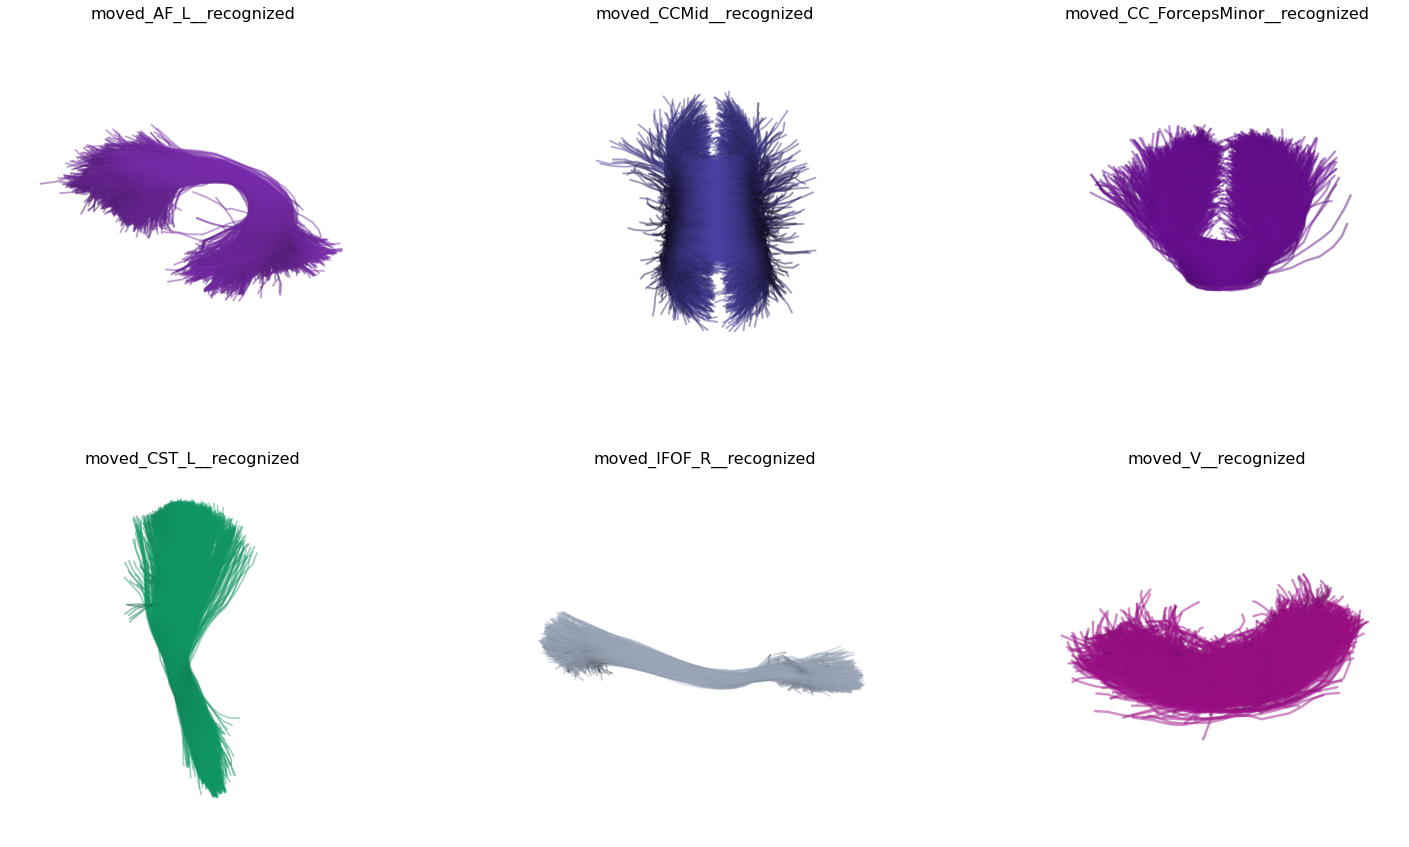

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(26,15))
for i, ax in enumerate(axs.reshape(-1)):
    show_bundles(ax, [atlas[i]], labels = df['bundle'][i], R=R[i])

### Random-pick

In [7]:
distance = 'mdf'
comb_method = 'random_pick'
skip_pairs = False

with TemporaryDirectory() as out_dir:
    
    # Save the bundle list as a temporary folder
    bundle_names = join(out_dir, 'bundles.tsv')
    df.to_csv(bundle_names, sep='\t', index=False)

    atlas, atlas_merged = compute_atlas_bundle(in_dir=in_dir,
                                                subjects=subjects,
                                                group=group,
                                                mid_path=mid_path,
                                                bundle_names=bundle_names,
                                                model_bundle_dir=model_bundle_dir,
                                                out_dir=out_dir,
                                                merge_out=merge_out,
                                                save_temp=save_temp,
                                                n_stream_min=n_stream_min,
                                                n_stream_max=n_stream_max,
                                                n_point=n_point,
                                                distance=distance,
                                                comb_method=comb_method,
                                                skip_pairs=skip_pairs)
clear_output(wait=True)
print('Finished')

finished


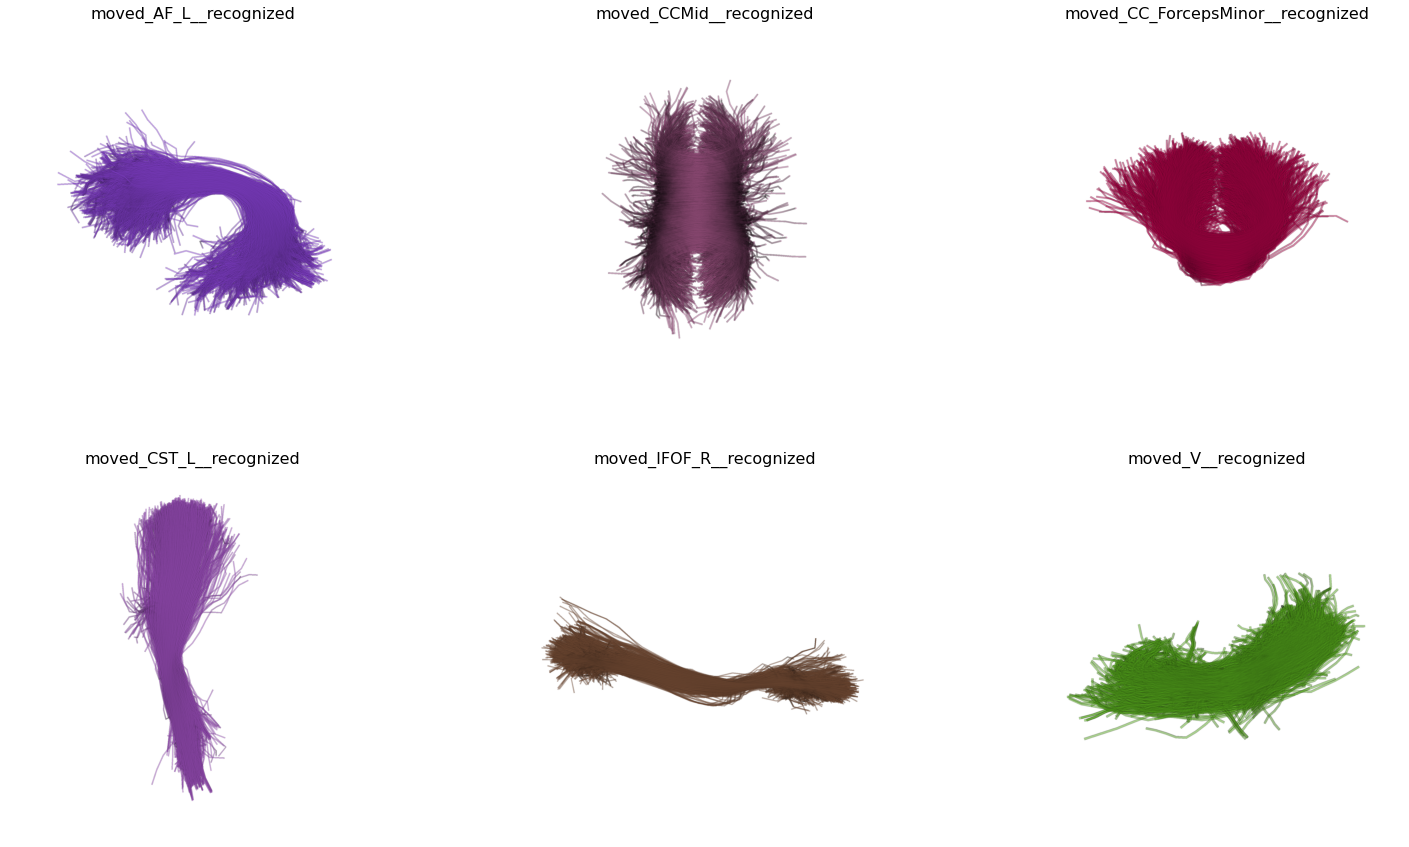

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(26,15))
for i, ax in enumerate(axs.reshape(-1)):
    show_bundles(ax, [atlas[i]], labels = df['bundle'][i], R=R[i])

## **HCP-10 data**

72 bundles of 10 control subjects [openly available](https://zenodo.org/record/1477956#.YQuJ0jqxXJU).

In [9]:
in_dir = '/home/david/Dropbox (MGEP)/projects/GSoC-2021/data/HCP10_Zenodo/'
mid_path = 'tracts'
subjects = None
group = None
df = pd.DataFrame(['AF_left', 'CC', 'CC_1', 'CST_left','IFO_right','FX_right'], columns=['bundle'])
R = [90, 0, 0, 90, -90, -90]

model_bundle_dir = None
merge_out = True
save_temp = False
n_stream_min = 10
n_stream_max = 3000
n_point = 20

### RLAP + keep

In [10]:
distance = 'mdf'
comb_method = 'rlap_keep'
skip_pairs = False

with TemporaryDirectory() as out_dir:
       
    # Save the bundle list as a temporary folder
    bundle_names = join(out_dir, 'bundles.tsv')
    df.to_csv(bundle_names, sep='\t', index=False)

    atlas, atlas_merged = compute_atlas_bundle(in_dir=in_dir,
                                                subjects=subjects,
                                                group=group,
                                                mid_path=mid_path,
                                                bundle_names=bundle_names,
                                                model_bundle_dir=model_bundle_dir,
                                                out_dir=out_dir,
                                                merge_out=merge_out,
                                                save_temp=save_temp,
                                                n_stream_min=n_stream_min,
                                                n_stream_max=n_stream_max,
                                                n_point=n_point,
                                                distance=distance,
                                                comb_method=comb_method,
                                                skip_pairs=skip_pairs)
clear_output(wait=True)
print('Finished')

finished


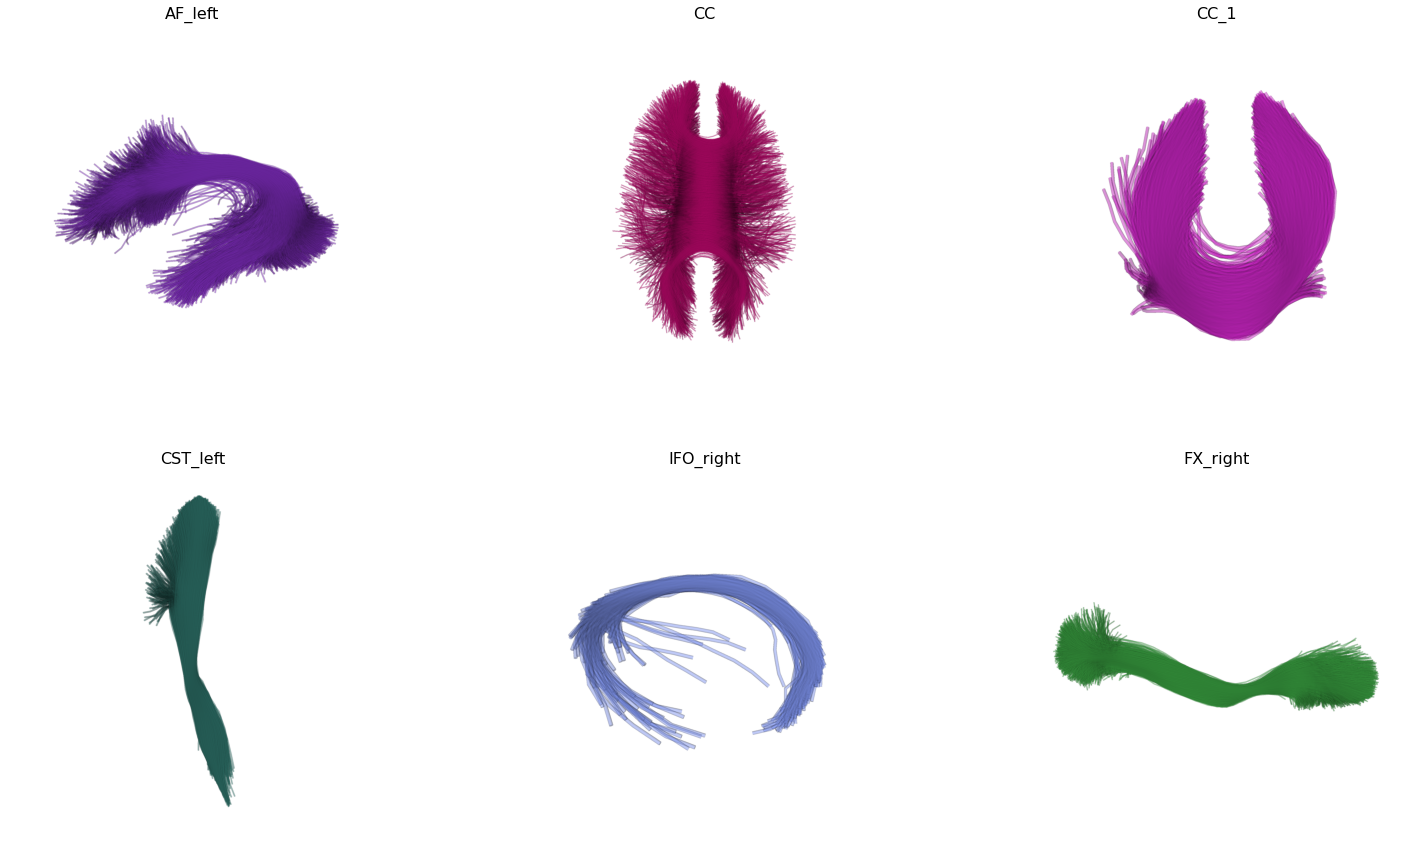

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(26,15))
for i, ax in enumerate(axs.reshape(-1)):
    show_bundles(ax, [atlas[i]], labels = df['bundle'][i], R=R[i])